In [18]:
import psycopg2
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

from config import DB_CONFIG


In [19]:
NUM_OF_VESSELS = 500000

conn = psycopg2.connect(**DB_CONFIG)
traj_sql = f'SELECT mmsi, dates, geom FROM vessels_points_jan ORDER BY mmsi DESC, dates DESC LIMIT {NUM_OF_VESSELS}'
df = gpd.GeoDataFrame.from_postgis(traj_sql, conn, geom_col='geom').drop('geom', axis=1)

In [20]:
vessel_stamps = [df[df['mmsi'] == vessel] for vessel in df.mmsi.unique()]

less_than = [0] * 50
vessel_stamps

[        mmsi               dates
 0  999999999 2018-01-15 18:28:51
 1  999999999 2018-01-15 18:28:41
 2  999999999 2018-01-15 18:28:21
 3  999999999 2018-01-15 18:27:51
 4  999999999 2018-01-15 18:27:12
 5  999999999 2018-01-15 18:26:51
 6  999999999 2018-01-15 18:25:12
 7  999999999 2018-01-15 18:25:02
 8  999999999 2018-01-15 18:23:32,
            mmsi               dates
 9     677083400 2018-01-30 22:56:04
 10    677083400 2018-01-30 22:53:01
 11    677083400 2018-01-30 22:49:59
 12    677083400 2018-01-30 22:46:57
 13    677083400 2018-01-30 22:43:55
 ...         ...                 ...
 7014  677083400 2017-12-31 23:18:25
 7015  677083400 2017-12-31 23:15:23
 7016  677083400 2017-12-31 23:12:22
 7017  677083400 2017-12-31 23:03:17
 7018  677083400 2017-12-31 23:00:14
 
 [7010 rows x 2 columns],
            mmsi               dates
 7019  677071800 2018-01-20 19:57:24
 7020  677071800 2018-01-20 19:57:04
 7021  677071800 2018-01-20 19:56:54
 7022  677071800 2018-01-20 19:56:33
 7

In [21]:
# stamps: mmsi | date pairs for each vessel sorted by date
for stamps in vessel_stamps:
    for i in range(len(stamps.dates) - 1):
        stamp = stamps.iloc[i].dates
        prev_stamp = stamps.iloc[i+1].dates
        days_diff = (stamp - prev_stamp).days

        # Less than a day difference
        if(days_diff == 0):
            sec = (stamp - prev_stamp).seconds
            pos = int(sec/5)

            if(pos>=49):
                pos = 49

            less_than[pos] +=1


KeyboardInterrupt: 

In [17]:
less_than

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [5]:
#PLOT
x_axis = []
for i in range(0,51):
    x_axis.append(i*5)

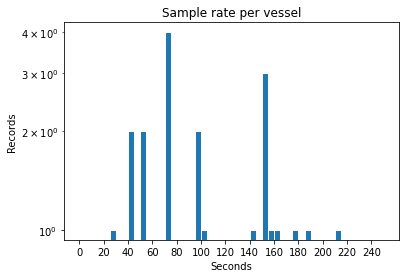

In [10]:
plt.figure('Sample rate per vessel')
plt.title('Sample rate per vessel')
plt.hist(less_than,log=True ,bins = x_axis, edgecolor = 'white')
plt.ylabel('Records')
plt.xlabel('Seconds')
plt.xticks(np.arange(0,250,20))
plt.show()

conn.close()